<a href="https://colab.research.google.com/github/jonesmo/Music_Genre_Clustering/blob/main/UL_capstone_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Music Information Retrieval: Finding Genre with Clustering**

The goal of this project is to create an unsupervised learning model that groups musical tracks by genre.  The data comes from the Greek Audio Dataset (GAD), which consists of 1000 tracks and 342 audio and lyrical features extracted from each track (based on the format of the [Million Song Dataset](http://millionsongdataset.com/)).  The eight genres represented are rock, pop, entexno, laiko, rempetiko, enallaktiko, hip hop/R&B, and monterno laiko; the dataset focuses on genres and artists popular in Greece and not addressed by other common MIR datasets.

**[Original data](https://hilab.di.ionio.gr/index.php/en/music-information-research/)**

**[Research paper by Makris, Kermanidis, Karydis](https://users.ionio.gr/~karydis/my_papers/MKKarydis2014%20-%20The%20Greek%20Audio%20Dataset.pdf)**

The dataset provides genre labels so that Rand Indices, contingency matrices, and color-coded visualizations can be used to assess how successfully a model performs.

##**------------Exploratory Data Analysis-------------------------**

###Import Libraries and Create Dataframe

In [ ]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Ellipse
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time
import umap
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
import matplotlib.patches as mpatches
from scipy import stats
from scipy.stats import boxcox, yeojohnson
from scipy.spatial.distance import cdist 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

gad_df = pd.read_csv('/content/gdrive/My Drive/Thinkful/Unsupervised Learning/Capstone_3_UL/Dataset.csv')

gad_df

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


'ARTIST'  ... 'LPC Overall Average8'
0    Magic de spell  ...              -0.003004
1            Trypes  ...              -0.018670
2            Trypes  ...              -0.036970
3            Trypes  ...              -0.029570
4            Trypes  ...              -0.014280
..              ...  ...                    ...
995    Hmiskoumpria  ...               0.006333
996    Hmiskoumpria  ...               0.022900
997              BO  ...              -0.011950
998              BO  ...              -0.027180
999              BO  ...              -0.001413

[1000 rows x 348 columns]

###Nulls and Missing Values

In [ ]:
pd.set_option('display.max_rows', None)

gad_df.isnull().sum()*100/gad_df.isnull().count()

'ARTIST'                                                                   0.0
'SONG'                                                                     0.0
'BEST URL FOUND'                                                           0.0
'GENRE'                                                                    0.0
'VALENCE'                                                                  0.0
'AROUSAL'                                                                  0.0
'Spectral Centroid Overall Standard Deviation0'                            0.0
'Spectral Rolloff Point Overall Standard Deviation0'                       0.0
'Spectral Flux Overall Standard Deviation0'                                0.0
'Compactness Overall Standard Deviation0'                                  0.0
'Spectral Variability Overall Standard Deviation0'                         0.0
'Root Mean Square Overall Standard Deviation0'                             0.0
'Fraction Of Low Energy Windows Overall Standard Dev

In [ ]:
pd.set_option('display.max_rows', 20)

There are no obvious nulls in the data.  I'll now check for non-numerical values that can't be converted to floats to see if nulls have been marked with strings.

In [ ]:
X = gad_df.drop(columns=['\'ARTIST\'', '\'SONG\'', '\'BEST URL FOUND\'', '\'GENRE\'', '\'VALENCE\'', '\'AROUSAL\''], axis=1)

In [ ]:
y = pd.DataFrame()

y['Genre'] = gad_df['\'GENRE\'']
y['Valence'] = gad_df['\'VALENCE\'']
y['Arousal'] = gad_df['\'AROUSAL\'']

In [ ]:
for column_name in X.columns:
    for value in X[column_name]:
        try:
            float(value)
        except:
          print(value)

?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?


I'll replace all the nulls that have been marked with '?' with NaN, and then I'll eliminate all nulls.

In [ ]:
X = X.replace('?', np.nan)

In [ ]:
pd.set_option('display.max_rows', None)

X.isnull().sum()*100/X.isnull().count()

'Spectral Centroid Overall Standard Deviation0'                            0.0
'Spectral Rolloff Point Overall Standard Deviation0'                       0.0
'Spectral Flux Overall Standard Deviation0'                                0.0
'Compactness Overall Standard Deviation0'                                  0.0
'Spectral Variability Overall Standard Deviation0'                         0.0
'Root Mean Square Overall Standard Deviation0'                             0.0
'Fraction Of Low Energy Windows Overall Standard Deviation0'               0.0
'Zero Crossings Overall Standard Deviation0'                               0.0
'Spectral Centroid Overall Average0'                                       0.0
'Spectral Rolloff Point Overall Average0'                                  0.0
'Spectral Flux Overall Average0'                                           0.0
'Compactness Overall Average0'                                             0.0
'Spectral Variability Overall Average0'             

In [ ]:
pd.set_option('display.max_rows', 20)

It looks like all the nulls are in two variables, 'Strength Of Strongest Beat Overall Standard Deviation0' and 'Strength Of Strongest Beat Overall Average0'.  I'll eliminate these two features.

In [ ]:
X = X.drop(columns=["'Strength Of Strongest Beat Overall Standard Deviation0'", "'Strength Of Strongest Beat Overall Average0'"], axis=1)

Now I'll check to make sure the targets y don't have any nulls.

In [ ]:
y.isnull().sum()*100/y.isnull().count()

Genre      0.0
Valence    0.0
Arousal    0.0
dtype: float64

###Outliers and Normality

Now I'll look at the distributions and boxplots of each variable.

In [ ]:
X.shape

(1000, 340)

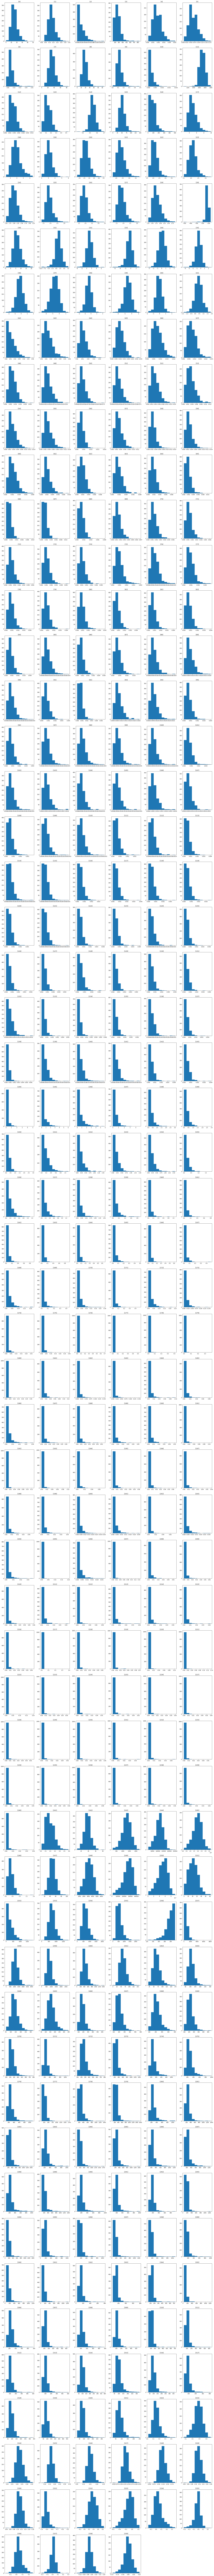

In [ ]:
plt.figure(figsize=(25, 300))

for i in range(1, len(X.columns) + 1):
    plt.subplot(57, 6, i)
    plt.hist(X[X.columns[i - 1]])
    plt.title([i - 1])

plt.tight_layout()
plt.show()

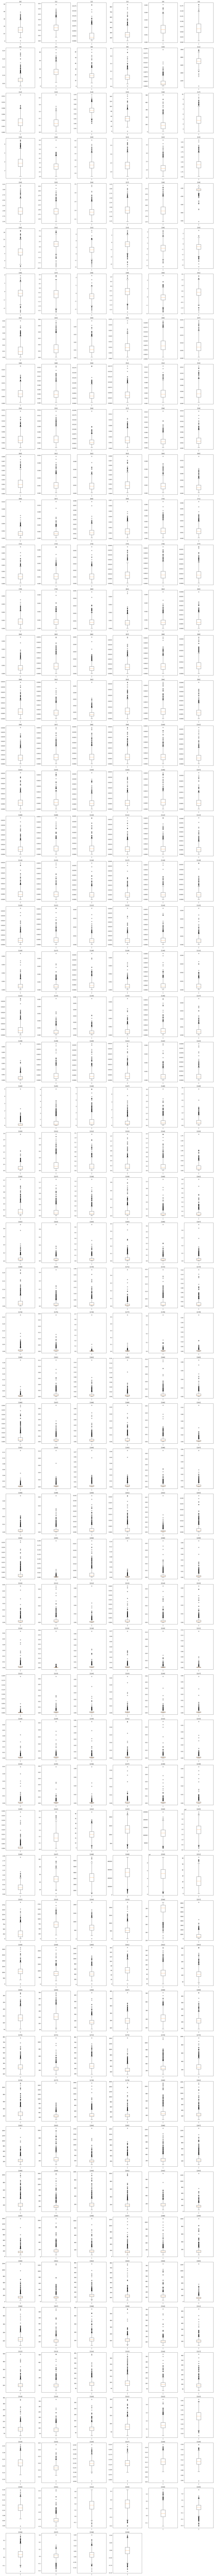

In [ ]:
plt.figure(figsize=(25, 300))

for i in range(1, len(X.columns) + 1):
    plt.subplot(57, 6, i)
    plt.boxplot(X[X.columns[i - 1]])
    plt.title([i - 1])

plt.tight_layout()
plt.show()

Many of the variables have normal distributions, and some have strong skewness.  Some have many outliers on the high end of the range, and some have outliers on the low end.  I'll first try using Yeo-Johnson transformation (similar to Box Cox but with the ability to handle zeroes) on all the variables to see if that eliminates the bulk of the outliers and non-normality.

In [ ]:
X_yj = pd.DataFrame()

for column_name in X.columns:
  yj_version, _ = yeojohnson(X[column_name])
  X_yj[column_name] = yj_version

X_yj

'Spectral Centroid Overall Standard Deviation0'  ...  'LPC Overall Average8'
0                                           5.304188  ...               -0.002991
1                                           5.021026  ...               -0.018181
2                                           4.571876  ...               -0.035095
3                                           4.780501  ...               -0.028360
4                                           5.048496  ...               -0.013992
..                                               ...  ...                     ...
995                                         6.148981  ...                0.006391
996                                         6.571793  ...                0.023665
997                                         5.271527  ...               -0.011748
998                                         4.865795  ...               -0.026154
999                                         5.648008  ...               -0.001410

[1000 rows x 340 columns]

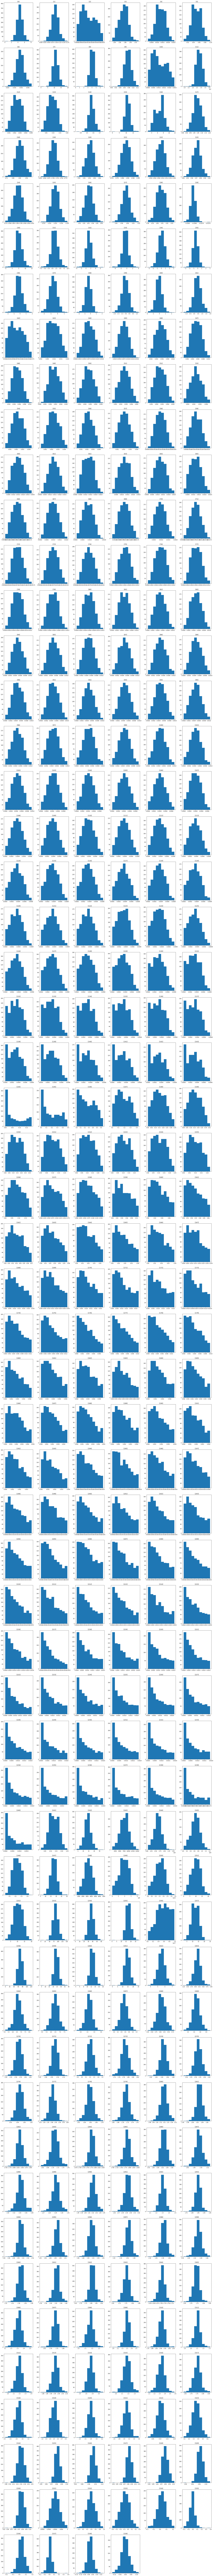

In [ ]:
plt.figure(figsize=(25, 300))

for i in range(1, len(X_yj.columns) + 1):
    plt.subplot(57, 6, i)
    plt.hist(X_yj[X_yj.columns[i - 1]])
    plt.title([i - 1])

plt.tight_layout()
plt.show()

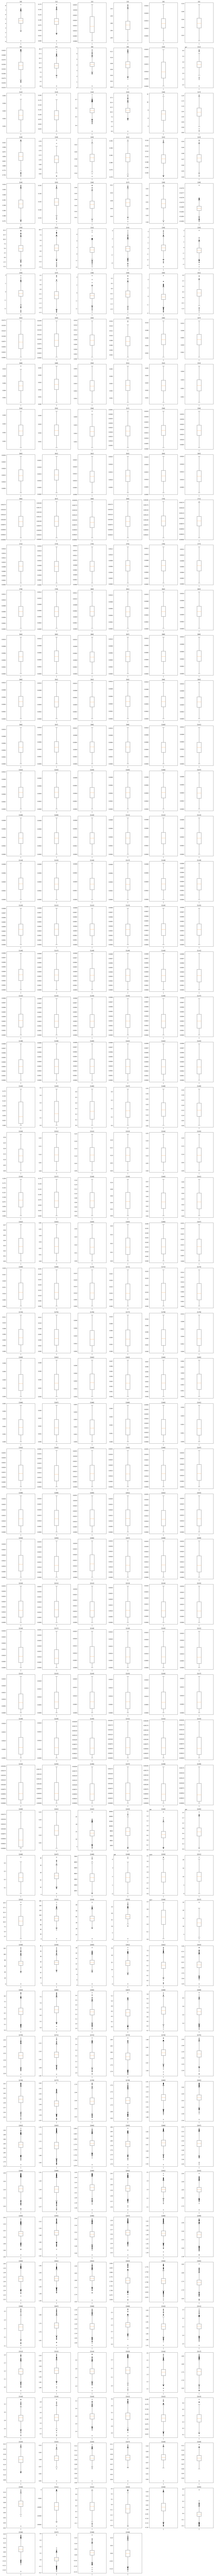

In [ ]:
plt.figure(figsize=(25, 300))

for i in range(1, len(X_yj.columns) + 1):
    plt.subplot(57, 6, i)
    plt.boxplot(X_yj[X_yj.columns[i - 1]])
    plt.title([i - 1])

plt.tight_layout()
plt.show()

The Yeo-Johnson transformation seems to have eliminated outliers on about 2/3 of the variables and to have made distributions more normal.  The remaining outliers I will leave in the data to avoid over-transforming it.

###Standardizing the Data

Before using PCA or any other unsupervised learning algorithm, I will standardize it.

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X_yj)

###Examining the Target

To get an idea of how I want the models to perform, I'll examine the balance of genres represented in the data.

In [ ]:
y['Genre'].unique()

array(['Rock', 'Pop', 'Entexno', 'Laiko', 'Rempetiko', 'Enallaktiko',
       'Hip Hop/R & B', 'Monterno Laiko'], dtype=object)

In [ ]:
y['Genre'].value_counts()

Entexno           195
Rock              195
Laiko             187
Monterno Laiko    175
Rempetiko          65
Pop                63
Hip Hop/R & B      60
Enallaktiko        60
Name: Genre, dtype: int64

##**------------Visualization with Dimensionality Reduction-------------------------**

###PCA

In [ ]:
pca = PCA(n_components=2)

pca_components = pca.fit_transform(X_std)

pca_components.shape

(1000, 2)

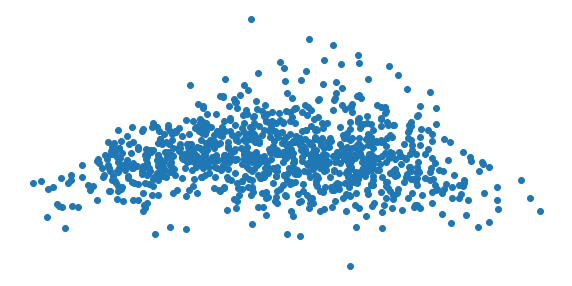

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
y['Genre_Cat'] = y['Genre'].astype('category')

y_numbers = y['Genre_Cat'].cat.codes

y_numbers

0      7
1      7
2      7
3      7
4      7
      ..
995    2
996    2
997    2
998    2
999    2
Length: 1000, dtype: int8

In [ ]:
genre_list = pd.DataFrame()

genre_list['Genre'] = y['Genre']
genre_list['Number'] = y_numbers

uniques = genre_list.groupby(['Genre']).mean()

uniques

Number
Genre                 
Enallaktiko          0
Entexno              1
Hip Hop/R & B        2
Laiko                3
Monterno Laiko       4
Pop                  5
Rempetiko            6
Rock                 7

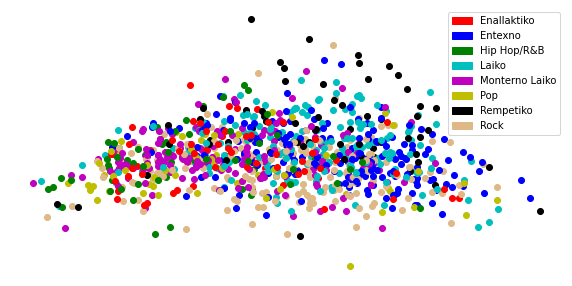

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","burlywood"]
genres = ['Enallaktiko', 'Entexno', 'Hip Hop/R&B', 'Laiko', 'Monterno Laiko', 'Pop', 'Rempetiko', 'Rock']

for i in range(pca_components.shape[0]):
    plt.scatter(pca_components[i, 0], pca_components[i, 1], 
             color=colours[y_numbers[i]]
        )

red = mpatches.Patch(color='r', label='Enallaktiko')
blue = mpatches.Patch(color='b', label='Entexno')
green = mpatches.Patch(color='g', label='Hip Hop/R&B')
cyan = mpatches.Patch(color='c', label='Laiko')
magenta = mpatches.Patch(color='m', label='Monterno Laiko')
yellow = mpatches.Patch(color='y', label='Pop')
black = mpatches.Patch(color='k', label='Rempetiko')
burlywood = mpatches.Patch(color='burlywood', label='Rock')

plt.legend(handles=[red, blue, green, cyan, magenta, yellow, black, burlywood])

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

###UMAP

For UMAP, I will try several values of n_neighbors and min_dist.  To start, I'll use n_neighbors=5 and min_dist=0.3.

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 9.20348834991455 seconds


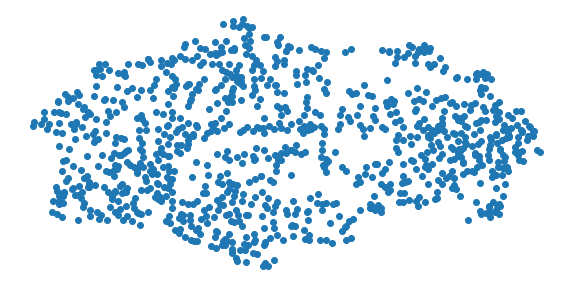

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

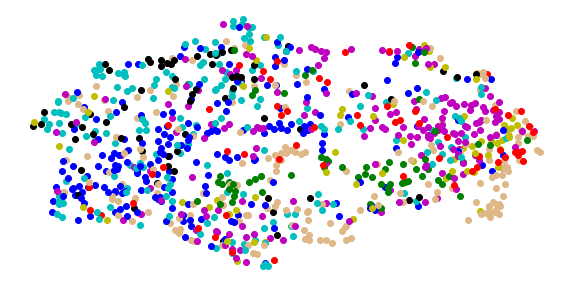

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","burlywood"]

for i in range(umap_results.shape[0]):
    plt.scatter(umap_results[i, 0], umap_results[i, 1], 
             color=colours[y_numbers[i]]
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

This seems to separate the data visually better than PCA, though the genres are still jumbled together. Now I'll try n_neighbors=3 and min_dist=0.3.

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=3,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 3.99959397315979 seconds


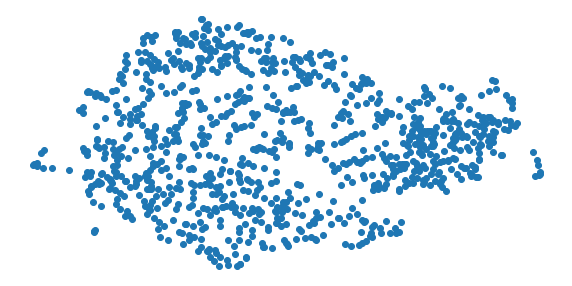

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

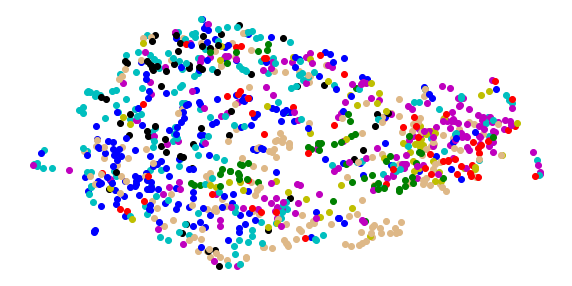

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","burlywood"]

for i in range(umap_results.shape[0]):
    plt.scatter(umap_results[i, 0], umap_results[i, 1], 
             color=colours[y_numbers[i]]
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Now I'll try n_neighbors = 7 and min_dist = 0.3.

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=7,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 4.34904146194458 seconds


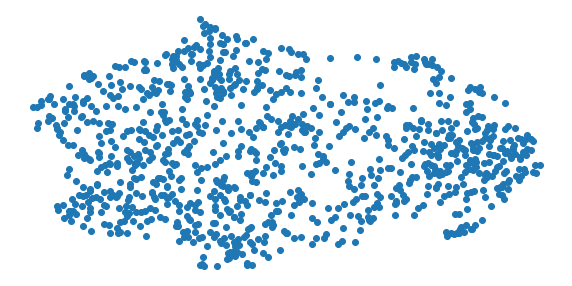

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

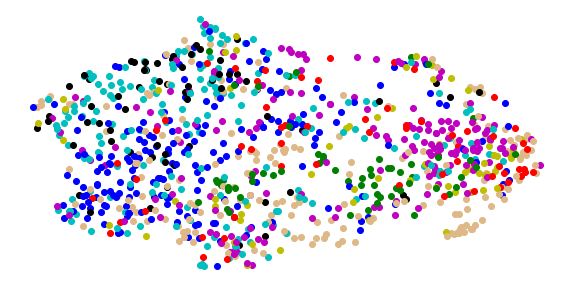

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","burlywood"]

for i in range(umap_results.shape[0]):
    plt.scatter(umap_results[i, 0], umap_results[i, 1], 
             color=colours[y_numbers[i]]
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

I'll now play with min_dist.

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=7,
                      min_dist=0.5,
                      metric='correlation').fit_transform(X_std)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 4.548467397689819 seconds


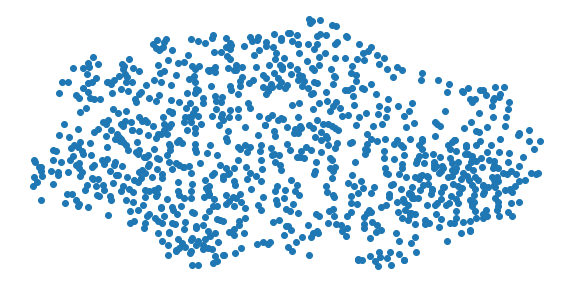

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

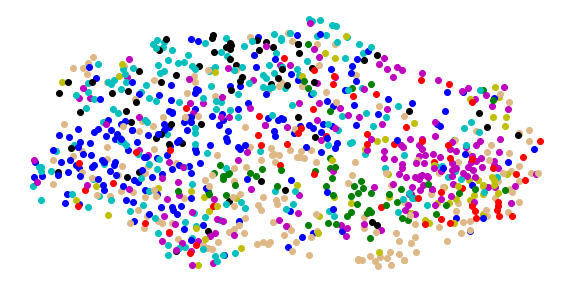

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","burlywood"]

for i in range(umap_results.shape[0]):
    plt.scatter(umap_results[i, 0], umap_results[i, 1], 
             color=colours[y_numbers[i]]
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=7,
                      min_dist=1,
                      metric='correlation').fit_transform(X_std)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 4.371036529541016 seconds


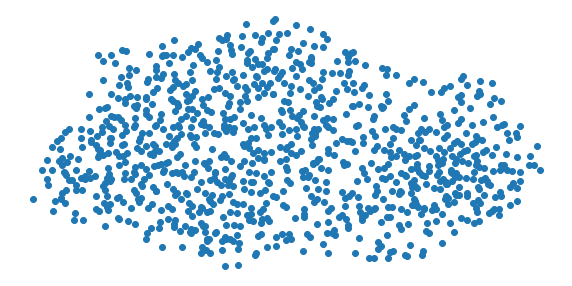

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

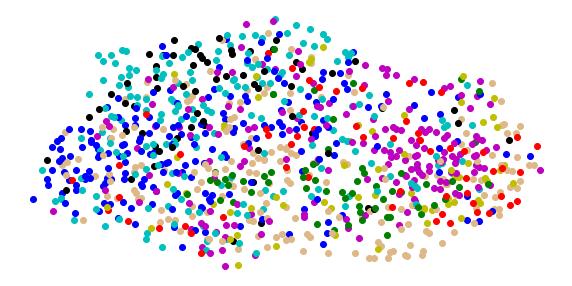

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","burlywood"]

for i in range(umap_results.shape[0]):
    plt.scatter(umap_results[i, 0], umap_results[i, 1], 
             color=colours[y_numbers[i]]
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=9,
                      min_dist=1,
                      metric='correlation').fit_transform(X_std)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 4.718881845474243 seconds


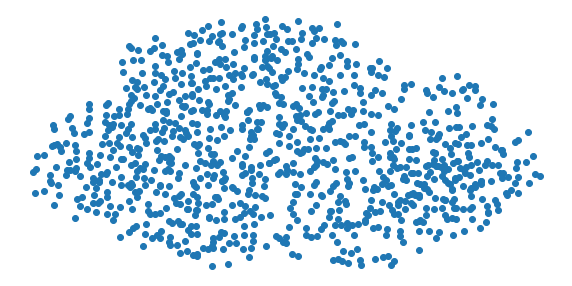

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

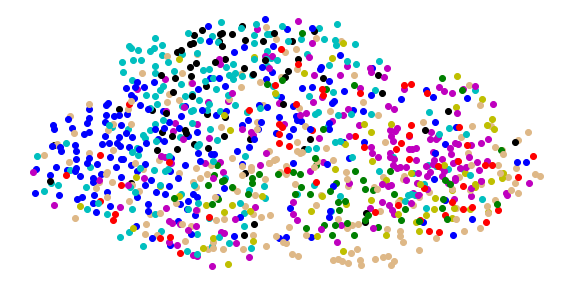

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","burlywood"]

for i in range(umap_results.shape[0]):
    plt.scatter(umap_results[i, 0], umap_results[i, 1], 
             color=colours[y_numbers[i]]
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

The data does not seem to be easily separable and overlaps quite a bit.  This may make clustering it accurately a challenge.

##**------------Clustering Models with All Features-------------------------**

I'll run the full dataset preliminarily through four different kinds of clustering algorithms: K-Means, Agglomerative Hierarchical Clustering, DBSCAN, and Gaussian Mixture Models (GMM).  I'll then tune the model(s) that show the most promise.  Afterwards, I'll use PCA on the data to reduce the number of features, and I'll run the same algorithms again to compare results.

First I'll define my metrics: Adjusted Rand Index (ARI), silhouette score, and crosstab

In [ ]:
print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

###K-Means

In [ ]:
kmeans_cluster = KMeans(n_clusters=8, random_state=32)

%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

1 loop, best of 3: 612 ms per loop


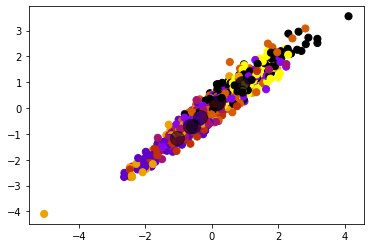

In [ ]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_pred, s=50, cmap='gnuplot')

centers = kmeans_cluster.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.03949863951133427
Silhouette:  0.08707922102290303


col_0            0   1   2   3   4   5   6   7
Genre                                         
Enallaktiko     15   1  16  13   0   7   5   3
Entexno          2  30  22  36  11  42  39  13
Hip Hop/R & B   22   0  18   6   3   5   1   5
Laiko            8  36  20  24  33  34  14  18
Monterno Laiko  32   7  57  23  11  22   3  20
Pop             21   2  18   1   2   6   5   8
Rempetiko        3  15   7   6  19   6   5   4
Rock            24  13  22  26   5  52  18  35

###Agglomerative Hierarchical Clustering

I'll try using complete, average, and ward linkages to see which produces a dendrogram most similar to the genre distributions we know are correct.

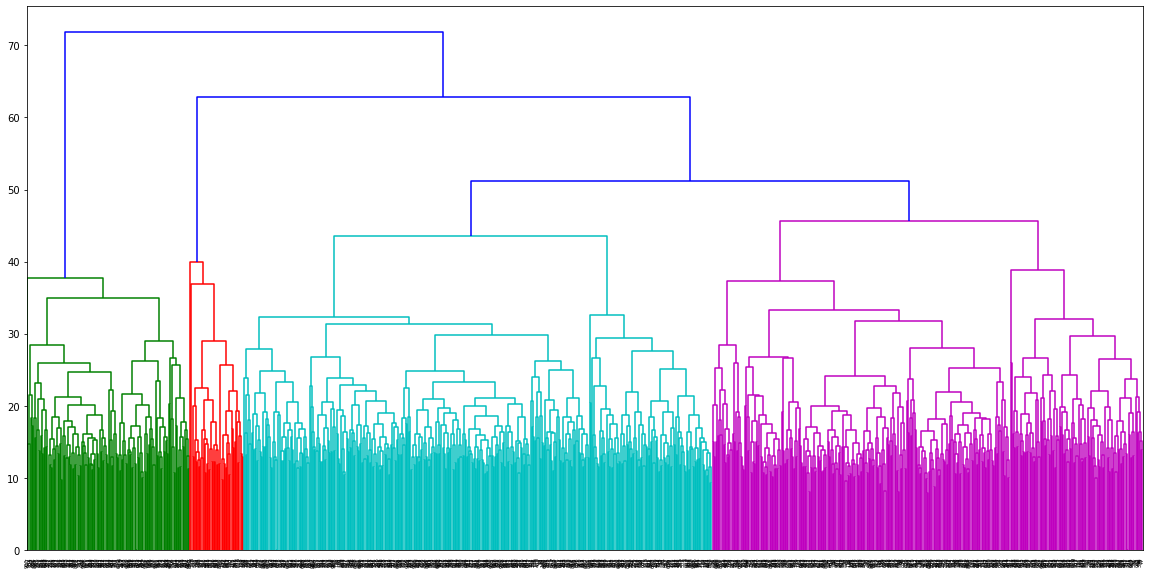

In [ ]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

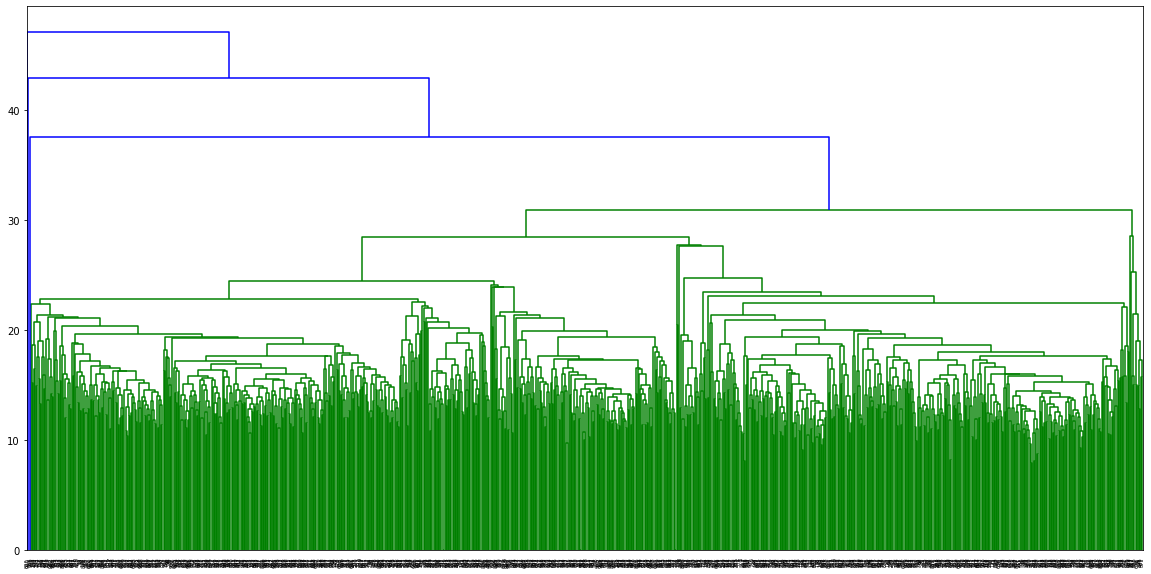

In [ ]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='average'))
plt.show()

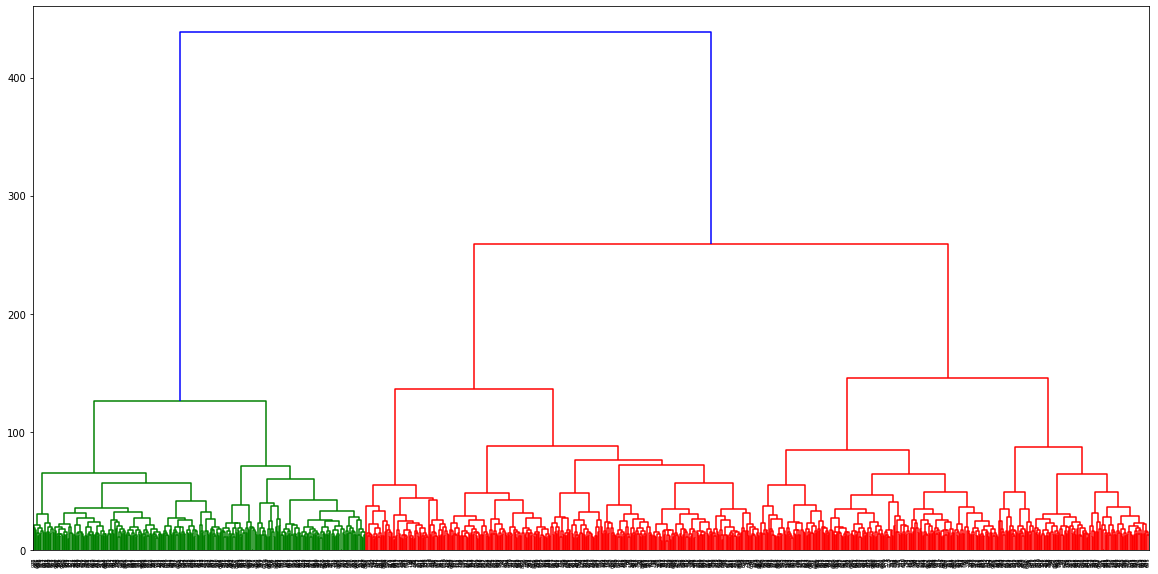

In [ ]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

None of these have particularly reasonable results, though complete linkage performs best.

In [ ]:
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=8)

y_pred = agg_cluster.fit_predict(X_std)

print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.052129081571880044
Silhouette:  0.06888715387790341


col_0            0   1   2   3    4   5   6   7
Genre                                          
Enallaktiko     10   1   2   1   12   1   0  33
Entexno         19   5  19   5  109   6  10  22
Hip Hop/R & B    4   3  10   2    2   1   0  38
Laiko           21  16  16   4   79   0  22  29
Monterno Laiko  17  18  11   4   30   2   2  91
Pop              3   1   3   3   13   0   0  40
Rempetiko        5   2   4   2   22   0  18  12
Rock            10  12  12  22   67  16   6  50

In [ ]:
agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='cosine',
                                      n_clusters=8)

y_pred = agg_cluster.fit_predict(X_std)

print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.04554314352025071
Silhouette:  -0.010093813989527403


col_0            0   1   2  3  4    5    6  7
Genre                                        
Enallaktiko      3   2   3  0  0   12   40  0
Entexno         10   1   8  1  0  130   45  0
Hip Hop/R & B    9   1   1  0  0    7   42  0
Laiko            7   0  15  1  0  110   53  1
Monterno Laiko   9   0  11  0  0   42  113  0
Pop              2   2   3  0  0   13   43  0
Rempetiko        2   0   2  2  0   43   16  0
Rock             4  14  17  0  1   91   67  1

In [ ]:
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=8)

y_pred = agg_cluster.fit_predict(X_std)

print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.05907529253878468
Silhouette:  0.05274687510314664


col_0            0   1   2   3   4   5   6   7
Genre                                         
Enallaktiko     13  15   4   7   4  15   2   0
Entexno         30   3  48  30  35  18  29   2
Hip Hop/R & B   16  31   0   4   0   7   1   1
Laiko           29   8  64  32  13  19  14   8
Monterno Laiko  33  28  21  15   1  63  12   2
Pop              9  17   5   1   3  22   6   0
Rempetiko        7   3  25   7   4   4   1  14
Rock            77  24  20   7  15  21  26   5

In [ ]:
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='euclidean',
                                      n_clusters=8)

y_pred = agg_cluster.fit_predict(X_std)

print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.04159308182796341
Silhouette:  0.07259134557356739


col_0            0   1   2   3   4   5  6  7
Genre                                       
Enallaktiko     18   6   6   4   6  20  0  0
Entexno          6  78  22  16  23  49  1  0
Hip Hop/R & B   21   2   6   0   3  27  0  1
Laiko           10  78  13   9  35  42  0  0
Monterno Laiko  39  21  16   1  15  83  0  0
Pop             20   4   7   3   2  27  0  0
Rempetiko        6  33   1   3  15   6  0  1
Rock            26  45  39  11  18  56  0  0

In [ ]:
agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='euclidean',
                                      n_clusters=8)

y_pred = agg_cluster.fit_predict(X_std)

print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.025331832456280252
Silhouette:  0.15618044686006985


col_0             0  1    2  3  4  5  6  7
Genre                                     
Enallaktiko      15  0   45  0  0  0  0  0
Entexno         118  2   73  1  1  0  0  0
Hip Hop/R & B     7  0   52  0  0  0  1  0
Laiko            88  0   99  0  0  0  0  0
Monterno Laiko   35  1  138  0  0  0  0  1
Pop              14  0   49  0  0  0  0  0
Rempetiko        26  7   31  1  0  0  0  0
Rock            101  1   92  0  0  1  0  0

Among the agglomerative clustering models, some have better silhouette scores than others, despite having lower ARI's; however, this seems to be because the model is favoring certain genres and almost entirely ignoring others.  Of the results with reasonable contingency matrices, the best is the model with 'complete' linkage and cosine affinity.  Its ARI is ~0.052, and its silhouette score is ~0.069.  This performs slightly better than the K-Means model on ARI but slightly worse on silhouette.

###DBSCAN

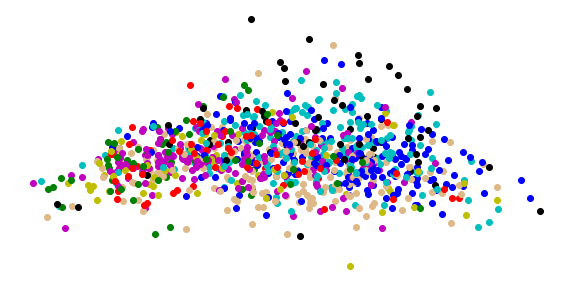

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","burlywood"]

for i in range(pca.shape[0]):
    plt.scatter(pca[i, 0], pca[i, 1], 
             color=colours[y_numbers[i]]
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

y_pred = dbscan_cluster.fit_predict(X_std)

print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.0


ValueError: ignored

Epsilon and min_samples are set such that all of the data points are considered to be one cluster.

In [ ]:
dbscan_cluster = DBSCAN(eps=0.5, min_samples=7)

y_pred = dbscan_cluster.fit_predict(X_std)

print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.0


ValueError: ignored

It looks like DBSCAN wants to group all the points into one genre.

###Gaussian Mixture Models (GMM)

In [ ]:
gmm_cluster = GaussianMixture(n_components=8, random_state=32)

y_pred = gmm_cluster.fit_predict(X_std)

print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.04387755382776605
Silhouette:  0.07755070182422114


col_0            0   1   2   3   4   5   6   7
Genre                                         
Enallaktiko      4  15  14   1  13   6   6   1
Entexno         35  32   3  51  17  19  27  11
Hip Hop/R & B    1   6  22   1  16   3  11   0
Laiko           14  28   8  46  21  10  29  31
Monterno Laiko   3  24  33  12  59  16  22   6
Pop              4   5  20   4  19   2   7   2
Rempetiko        4   8   4  13   4   1   7  24
Rock            16  15  25  25  24  40  43   7

###Selecting the Best Models

In [ ]:
comparison = pd.DataFrame()

comparison['Model'] = ['K-Means', 'Agglomerative Clustering', 'GMM']
comparison['ARI'] = [0.039, 0.052, 0.044]
comparison['Silhouette'] = [0.087, 0.069, 0.078]

comparison

Model    ARI  Silhouette
0                   K-Means  0.039       0.087
1  Agglomerative Clustering  0.052       0.069
2                       GMM  0.044       0.078

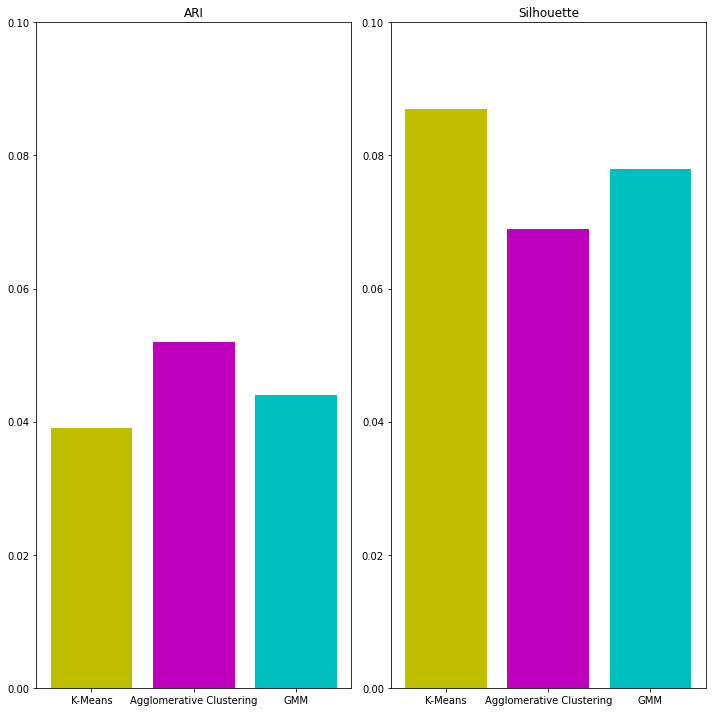

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.bar(comparison['Model'], comparison['ARI'], color=['y', 'm', 'c'])
plt.ylim(0, 0.1)
plt.title('ARI')

plt.subplot(1, 2, 2)
plt.bar(comparison['Model'], comparison['Silhouette'], color=['y', 'm', 'c'])
plt.ylim(0, 0.1)
plt.title('Silhouette')

plt.tight_layout()
plt.show()

None of these models performs particularly well, and their ARI and silhouette scores are similar.  Because it has the best silhouette score, I will choose to work with K-Means.  I will also tune GMM because it has the second best silhouette score and ARI.

##**------------Tuning the Models-------------------------**

###Tuning K-Means

There aren't a lot of hyperparameters to tune with a k-means model.  I'll start by adjusting n_init to see if it makes a difference.

In [ ]:
kmeans_cluster = KMeans(n_clusters=8, random_state=32, n_init=20)

%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

1 loop, best of 3: 1.18 s per loop


In [ ]:
print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.03949863951133427
Silhouette:  0.08707922102290303


col_0            0   1   2   3   4   5   6   7
Genre                                         
Enallaktiko     15   1  16  13   0   7   5   3
Entexno          2  30  22  36  11  42  39  13
Hip Hop/R & B   22   0  18   6   3   5   1   5
Laiko            8  36  20  24  33  34  14  18
Monterno Laiko  32   7  57  23  11  22   3  20
Pop             21   2  18   1   2   6   5   8
Rempetiko        3  15   7   6  19   6   5   4
Rock            24  13  22  26   5  52  18  35

This does just as well as having a lower n_init.

In [ ]:
kmeans_cluster = KMeans(n_clusters=8, random_state=32, n_init=5)

%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

1 loop, best of 3: 291 ms per loop


In [ ]:
print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.03736508103187163
Silhouette:  0.08551969245371324


col_0            0   1   2   3   4   5   6   7
Genre                                         
Enallaktiko     14   0  16   3   1   3  15   8
Entexno         22  11  31  54  24  29   2  22
Hip Hop/R & B   18   3   5   4   0   0  21   9
Laiko           24  30  17  32  35  12   8  29
Monterno Laiko  60  12  24  16   4   2  31  26
Pop             20   4   1   7   2   3  20   6
Rempetiko        8  15   3   9  17   4   3   6
Rock            30   5  27  44  10  11  24  44

This does slightly worse than n_init=10.  Now I'll try using n_clusters > 8 to see if it's able to differentiate groups more clearly that way.

In [ ]:
kmeans_cluster = KMeans(n_clusters=10, random_state=32, n_init=10)

%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

1 loop, best of 3: 544 ms per loop


In [ ]:
print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.03545862134876362
Silhouette:  0.07005473174505306


col_0            0   1   2   3   4   5   6   7   8   9
Genre                                                 
Enallaktiko     12   2  17  10   0   3   4   0   7   5
Entexno         34  37  23   5  12  26  12   4   1  41
Hip Hop/R & B    7   0   7  24   3   0   5   0   9   5
Laiko           22  28  21   6  31  11  18  22   6  22
Monterno Laiko  21   6  42  36  10   2  18   7  17  16
Pop              1   2  16  14   2   3   6   2  11   6
Rempetiko        6  12   6   1  18   4   4   9   3   2
Rock            27  16  19  18   5  13  36  10  13  38

In [ ]:
kmeans_cluster = KMeans(n_clusters=12, random_state=32, n_init=10)

%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

1 loop, best of 3: 624 ms per loop


In [ ]:
print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.03749965182615336
Silhouette:  0.06620405792200865


col_0           0   1   2   3   4   5   6   7   8   9   10  11
Genre                                                         
Enallaktiko     10   2  12  11   0   3   4   0   5   2   4   7
Entexno         30  31  14   6   6  22  12   6   0  28  10  30
Hip Hop/R & B    6   0   5  26   0   0   5   0   7   2   4   5
Laiko           19  23  16   7  21  10  17  23   4  13  16  18
Monterno Laiko  19   2  44  36   3   2  18   8  12   9   8  14
Pop              1   2  15  14   0   3   6   1  10   6   4   1
Rempetiko        5  12   5   1  12   3   4  10   3   2   6   2
Rock            14  10  15  20   5   9  39   9   9  22   5  38

Both of these perform worse than the model using n_clusters=8.  I'll now try the Elbow Method to make sure I haven't missed a good n_clusters.

In [ ]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(6,16) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X_std) 
    kmeanModel.fit(X_std)     
      
    distortions.append(sum(np.min(cdist(X_std, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X_std.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X_std, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X_std.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

6 : 12.886588102748151
7 : 12.713269965799974
8 : 12.558088192183137
9 : 12.464946638310185
10 : 12.364227293395048
11 : 12.28149311653186
12 : 12.203289753762379
13 : 12.126572881577024
14 : 12.069843348741834
15 : 12.000804137404444


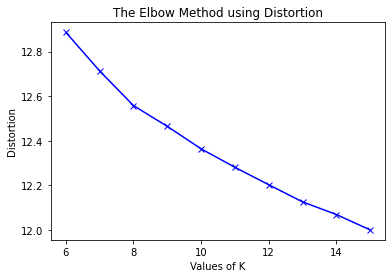

In [ ]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [ ]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val))

6 : 172915.4970920328
7 : 168044.11545777362
8 : 163853.32181763172
9 : 161160.28737983698
10 : 158378.15648031342
11 : 156067.39195973106
12 : 154227.86883491732
13 : 152250.3336880626
14 : 150716.203272187
15 : 148817.3959254969


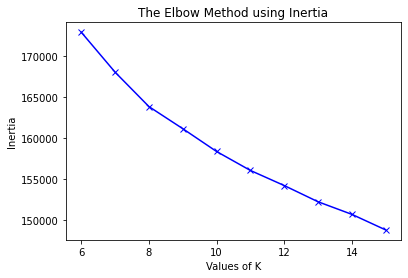

In [ ]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In the case of both inertia and distortion, there isn't a pronounced elbow in the range n_clusters = [6, 16].  However, there is a very slight elbow, so I'll consider n_clusters=8 to be the optimum number.

###Tuning GMM

For the GMM model, I'll tune n_init, covariance_type, and n_components to see what yields the best result.

In [ ]:
gmm_cluster = GaussianMixture(n_components=8, random_state=32, n_init=1)

y_pred = gmm_cluster.fit_predict(X_std)

print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.04387755382776605
Silhouette:  0.07755070182422114


col_0            0   1   2   3   4   5   6   7
Genre                                         
Enallaktiko      4  15  14   1  13   6   6   1
Entexno         35  32   3  51  17  19  27  11
Hip Hop/R & B    1   6  22   1  16   3  11   0
Laiko           14  28   8  46  21  10  29  31
Monterno Laiko   3  24  33  12  59  16  22   6
Pop              4   5  20   4  19   2   7   2
Rempetiko        4   8   4  13   4   1   7  24
Rock            16  15  25  25  24  40  43   7

In [ ]:
gmm_cluster = GaussianMixture(n_components=8, random_state=32, n_init=2)

y_pred = gmm_cluster.fit_predict(X_std)

print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.04387755382776605
Silhouette:  0.07755070182422114


col_0            0   1   2   3   4   5   6   7
Genre                                         
Enallaktiko      4  15  14   1  13   6   6   1
Entexno         35  32   3  51  17  19  27  11
Hip Hop/R & B    1   6  22   1  16   3  11   0
Laiko           14  28   8  46  21  10  29  31
Monterno Laiko   3  24  33  12  59  16  22   6
Pop              4   5  20   4  19   2   7   2
Rempetiko        4   8   4  13   4   1   7  24
Rock            16  15  25  25  24  40  43   7

In [ ]:
gmm_cluster = GaussianMixture(n_components=8, random_state=32, n_init=3)

y_pred = gmm_cluster.fit_predict(X_std)

print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.04387755382776605
Silhouette:  0.07755070182422114


col_0            0   1   2   3   4   5   6   7
Genre                                         
Enallaktiko      4  15  14   1  13   6   6   1
Entexno         35  32   3  51  17  19  27  11
Hip Hop/R & B    1   6  22   1  16   3  11   0
Laiko           14  28   8  46  21  10  29  31
Monterno Laiko   3  24  33  12  59  16  22   6
Pop              4   5  20   4  19   2   7   2
Rempetiko        4   8   4  13   4   1   7  24
Rock            16  15  25  25  24  40  43   7

In [ ]:
gmm_cluster = GaussianMixture(n_components=8, random_state=32, n_init=1, covariance_type='tied')

y_pred = gmm_cluster.fit_predict(X_std)

print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.046690604816389335
Silhouette:  0.07313064880403695


col_0            0   1   2   3   4   5   6   7
Genre                                         
Enallaktiko      4  16  15   1  12   5   6   1
Entexno         32  31   4  56  18  19  26   9
Hip Hop/R & B    0   8  24   3  13   2  10   0
Laiko           12  28   8  48  20  12  27  32
Monterno Laiko   1  22  31  16  63  14  23   5
Pop              4   5  19   4  20   3   6   2
Rempetiko        4   7   4  14   4   1   8  23
Rock            14  13  22  28  28  41  43   6

In [ ]:
gmm_cluster = GaussianMixture(n_components=8, random_state=32, n_init=1, covariance_type='spherical')

y_pred = gmm_cluster.fit_predict(X_std)

print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.041910517620915924
Silhouette:  0.07472219093376727


col_0            0   1   2   3   4   5   6   7
Genre                                         
Enallaktiko      4  16  15   1  11   6   6   1
Entexno         35  33   3  50  15  23  26  10
Hip Hop/R & B    1   6  23   1  15   3  11   0
Laiko           13  35   8  45  20  10  27  29
Monterno Laiko   3  25  33  14  57  16  22   5
Pop              5   4  20   2  19   3   8   2
Rempetiko        4   9   4  14   4   1   7  22
Rock            16  20  25  24  23  41  38   8

In [ ]:
gmm_cluster = GaussianMixture(n_components=8, random_state=32, n_init=1, covariance_type='diag')

y_pred = gmm_cluster.fit_predict(X_std)

print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.042528508647075795
Silhouette:  0.05925815625897669


col_0            0   1   2   3   4   5   6   7
Genre                                         
Enallaktiko      3  15  15   3  12   6   6   0
Entexno         22  35   4  57  16  35  18   8
Hip Hop/R & B    1   6  26   2  11   5   8   1
Laiko           12  35   9  29  19  31  20  32
Monterno Laiko   1  26  33  15  60  14  20   6
Pop              4   4  20   4  20   2   7   2
Rempetiko        7  11   4   6   3   6   5  23
Rock            12  22  22  21  26  39  40  13

In [ ]:
gmm_cluster = GaussianMixture(n_components=10, random_state=32, n_init=1)

y_pred = gmm_cluster.fit_predict(X_std)

print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.0393132510392931
Silhouette:  0.0726755013577525


col_0            0   1   2   3   4   5   6   7   8   9
Genre                                                 
Enallaktiko      3  21  16   1   2   2  12   0   1   2
Entexno         21  34   3   9   7  23  30   7  10  51
Hip Hop/R & B    0   8  21   0  14   5   9   0   3   0
Laiko            9  19   8  24  15   9  29  21  23  30
Monterno Laiko   2  30  40   8  36  11  29   3  11   5
Pop              3  10  21   1  11   6   5   2   3   1
Rempetiko        3   6   4   5   2   0   7  16  12  10
Rock             9  19  27  19  16  37  44   6   3  15

In [ ]:
gmm_cluster = GaussianMixture(n_components=12, random_state=32, n_init=1)

y_pred = gmm_cluster.fit_predict(X_std)

print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.035710876511803595
Silhouette:  0.06703166913062707


col_0           0   1   2   3   4   5   6   7   8   9   10  11
Genre                                                         
Enallaktiko      3  20  16   4   1   1   6   0   2   2   2   3
Entexno         16  33   6  22   8  18  22   6  10  44  10   0
Hip Hop/R & B    0   7  26   5   5   1   6   0   3   0   0   7
Laiko            8  21   8   9  10   7  26  21  24  23  25   5
Monterno Laiko   1  38  49  12  14   4  18   2  12   4  11  10
Pop              3  13  18   1   4   6   4   2   3   0   1   8
Rempetiko        2   5   3   2   4   2   5  16  12   8   4   2
Rock             5  18  24  21  26  15  25   6   3  14  30   8

The best-performing Gaussian Mixture model is the first one we ran, with n_init=1, n_components=8, and covariance_type='full'.  This has a silhouette score of 0.078 (marginally worse than K-Means) and an ARI of 0.044 (marginally better than K-Means).

##**------------Clustering Models with Reduced Features-------------------------**

###PCA

I will now apply PCA to the transformed and standardized data to reduce the feature space from 340 dimensions to 30.  I'll then run the same two models on this data and see if the results are better than when all features are used.

In [ ]:
pca = PCA(n_components=30)

pca_components = pca.fit_transform(X_std)

pca_components.shape

(1000, 30)

In [ ]:
kmeans_cluster = KMeans(n_clusters=8, random_state=32, n_init=10)

%timeit kmeans_cluster.fit(pca_components)
y_pred = kmeans_cluster.predict(pca_components)

1 loop, best of 3: 199 ms per loop


In [ ]:
print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(pca_components, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.03904497938065101
Silhouette:  0.11231801321130104


col_0            0   1   2   3   4   5   6   7
Genre                                         
Enallaktiko     15   2   3   7  15   4   0  14
Entexno          2  43  15  38  21  29  12  35
Hip Hop/R & B   22   0   7   5  17   1   1   7
Laiko            8  36  19  33  21  12  35  23
Monterno Laiko  31   8  21  21  59   3  11  21
Pop             20   2   7   6  20   5   2   1
Rempetiko        3  17   4   5   7   4  17   8
Rock            23  17  35  53  23  13   6  25

In [ ]:
gmm_cluster = GaussianMixture(n_components=8, random_state=32)

y_pred = gmm_cluster.fit_predict(pca_components)

print('ARI: ', metrics.adjusted_rand_score(y['Genre'], y_pred))
print('Silhouette: ', metrics.silhouette_score(pca_components, y_pred, metric='euclidean'))
pd.crosstab(y['Genre'], y_pred)

ARI:  0.03783579335042587
Silhouette:  0.05932418408939003


col_0            0   1   2   3   4   5   6   7
Genre                                         
Enallaktiko      3  17  15   1   1  15   7   1
Entexno         13  32  40  43  17   2  33  15
Hip Hop/R & B    0  16   9   1   0  26   5   3
Laiko            8  33  34  14  30   6  27  35
Monterno Laiko   1  62  49   5   5  25  15  13
Pop              3  13   8   3   2  25   6   3
Rempetiko        2   6  11   4  18   2   6  16
Rock             6  28  50  20   8  26  51   6

The Gaussian Mixture model performs worse on PCA components than it does on the full feature set.  The K-Means model produces a better silhouette score on the PCA components but its ARI remains the same; it looks like it's more successful, but it's not.

In [ ]:
explained_variance = np.var(pca_components, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
sorted = np.sort(explained_variance_ratio)[::-1]

print('PCA Components Sorted by Explained Variance: \n {}'.format(sorted))

PCA Components Sorted by Explained Variance: 
 [0.54830461 0.10680644 0.05655705 0.04935181 0.03575206 0.02876728
 0.01832719 0.01380968 0.01354075 0.01055422 0.01031598 0.00996903
 0.00835189 0.00818039 0.00739857 0.00706891 0.00688472 0.00622622
 0.00587509 0.00533306 0.00496201 0.00486913 0.00461876 0.00458195
 0.00436594 0.00425012 0.00389337 0.00381585 0.00376745 0.00350047]


It's likely the same algorithms could be run on the first eleven PCA components, or fewer, with similar results.

##**------------Valence and Arousal-------------------------**

In creating the X and y dataframes, I placed 'Valence' and 'Arousal' in the y dataframe because they were presented by the researchers as targets for prediction.  After getting such poor results, though, I added 'Valence' and 'Arousal' back into the dataframe X and re-ran all of the above visualizations and models incorporating those as features to see if it would help.  It did not change ARI's and made silhouette scores very slightly worse; I do not repeat all those steps here.  I've left 'Valence' and 'Arousal' in the y dataframe and have not used them as part of the prediction.

##**------------Discussion and Next Steps-------------------------**

These models do not work well!  They are barely better than random guessing.

I spent some time on YouTube familiarizing myself with these genres.  I'm a musician, but I'm not familiar with Greek music nor do I speak Greek.  As a cultural outsider, my ability to identify Greek songs based on genre is very poor.  Outside of pop, rock, and hip hop/R&B, I could not separate the genres by listening.  I doubt a human with no knowledge of Greek music would do much better than the computer.

I cite here an [article](https://medium.com/latinxinai/discovering-descriptive-music-genres-using-k-means-clustering-d19bdea5e443) about using K-Means to identify music genres.  The author's definitions of audio features, most of them human-measured and human-selected, ring true to me as the kinds of characteristics that differentiate genres of music.  How acoustic is it?  What instruments are used?  How danceable is it?  The Greek Audio Dataset extracts audio features around frequency, timbre, and percussive content, and it does incorporate lyric information, but its algorithms do not hear danceability or instrumentation or acousticness.  It doesn't hear the way a human does.  At the same time, the author of this paper also does not have great success in clustering tracks by genre.  Instead, he posits that unsupervised clustering could instead be used to drive recommendation engines by defining new kinds of genre.

To improve these models in the future, I would revisit the data collection process.  The GAD collects a huge number of features from each song, but it's apparently not the right set of features.  Libraries like Librosa and other audio tools could be studied for alternative ways to extract audio features.  In addition, any information from record labels or composer societies like BMI or ASCAP could be queried for information about instrumentation, since instruments tend to be a defining feature of musical genres.

In an ideal world, I would like to run the same clustering models adding the following features to see if it performs any better:
*   Instrumentation
*   Bassiness (define based on low frequency content and percussiveness)
*   Rhythmic Structure (categorical, defined by regularity of rhythm and beat pattern)



At the same time, one of the things that makes genre so hard to identify is that genre identification requires cultural and historical knowledge, and cultural outsiders including computers don't have that background.